In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import missingno as msno
# # import sweetviz as sv
# import dtale
# import phik 
# from phik import resources
# from phik.report import plot_correlation_matrix

pd.set_option('display.max_column', None)
sns.set(style = 'whitegrid')

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')

In [4]:
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [5]:
print(df['rainfall'].value_counts())

rainfall
1    1650
0     540
Name: count, dtype: int64


In [6]:
print(df.shape)
print(df.info())
print(df.describe(include = 'all'))
print(df.isnull().sum())

(2190, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB
None
                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.5000

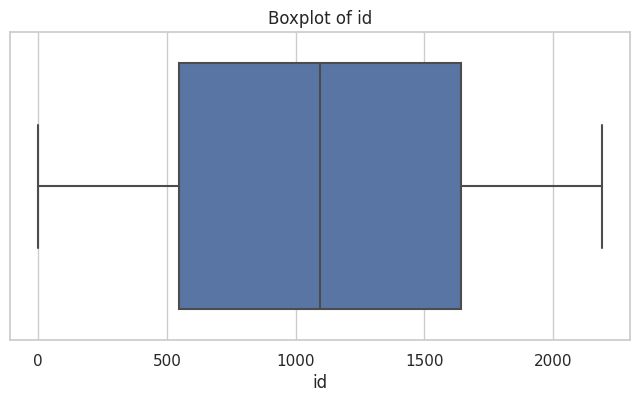

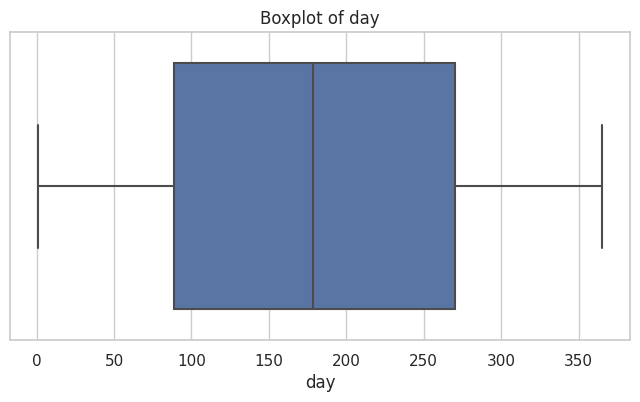

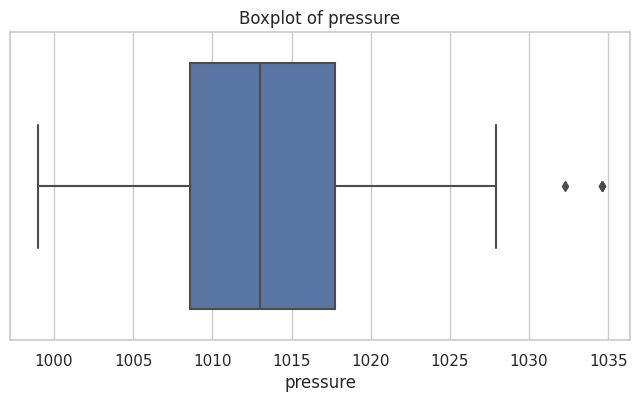

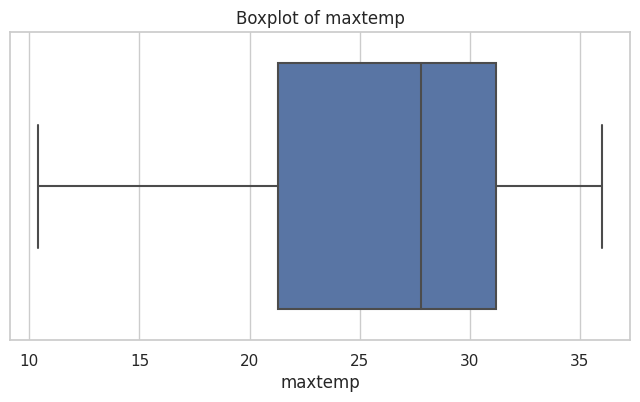

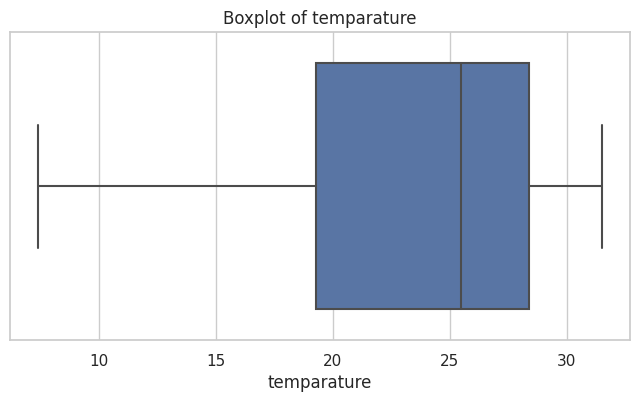

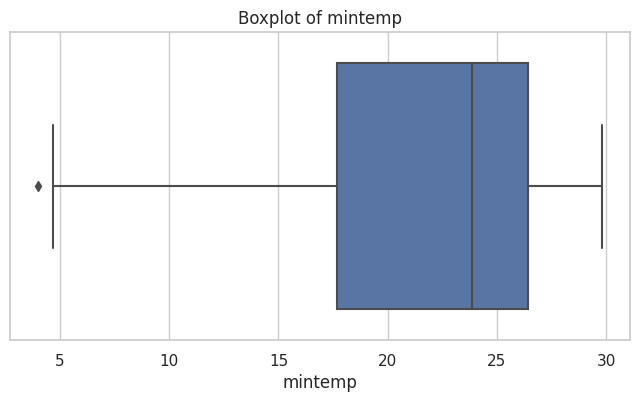

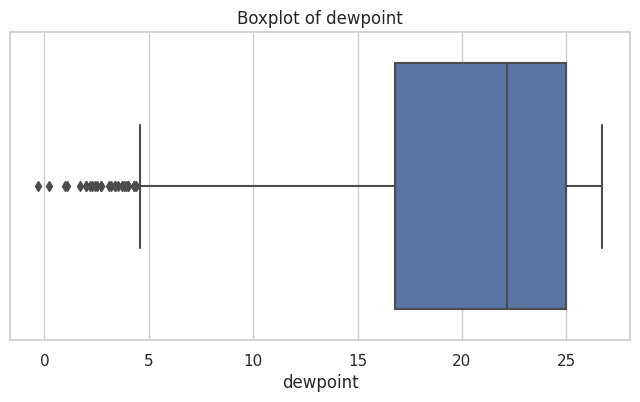

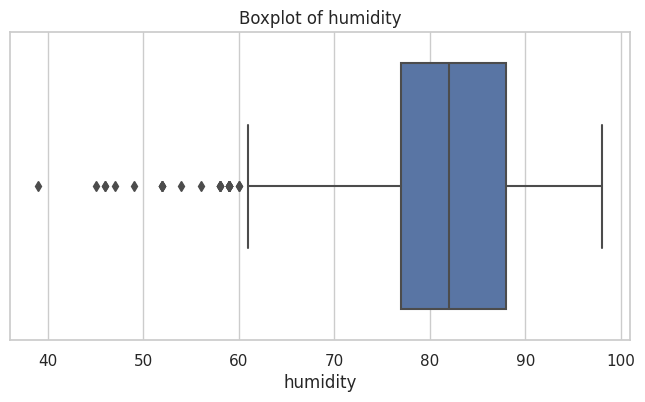

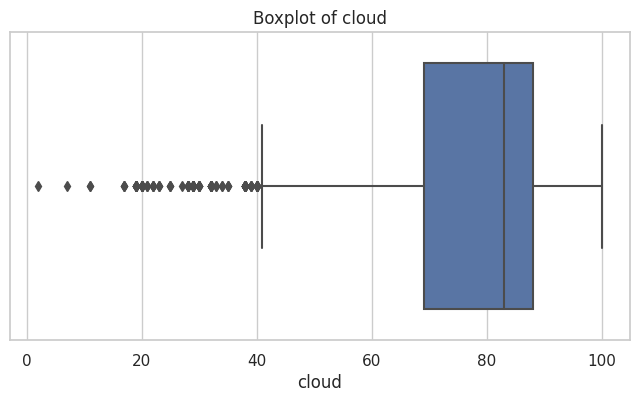

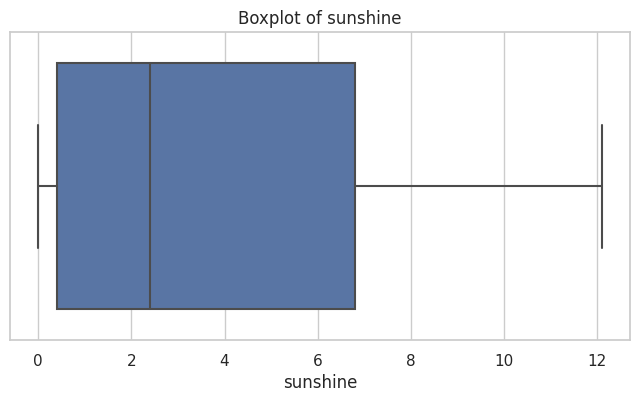

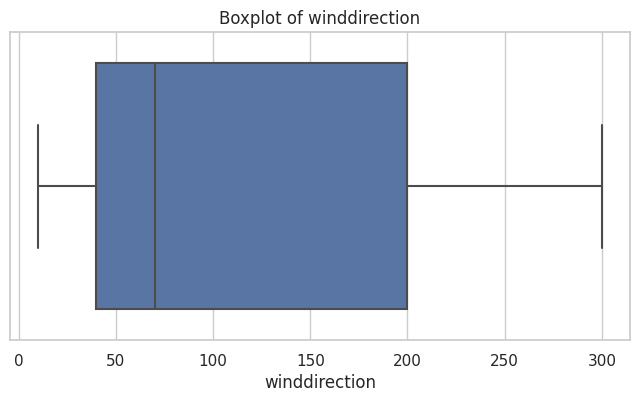

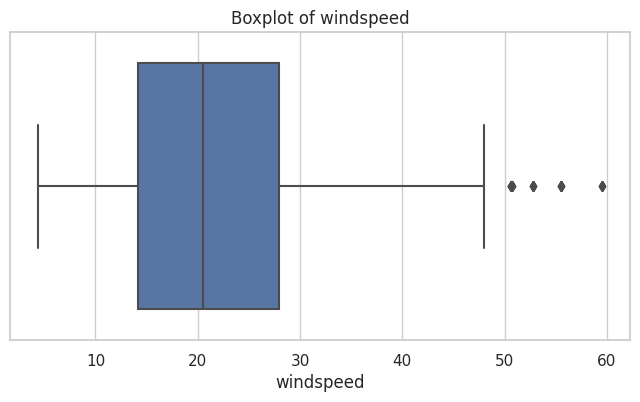

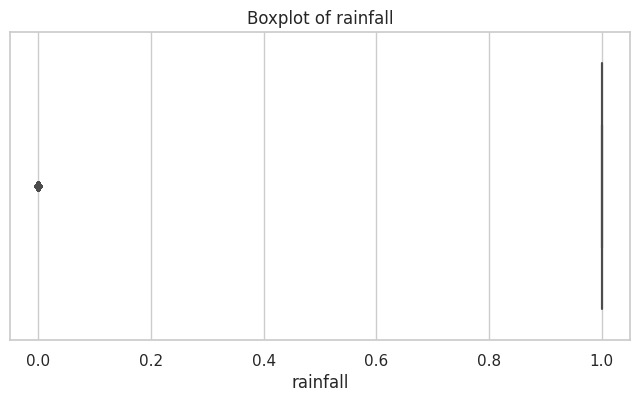

In [7]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [8]:
from phik import phik_matrix
from phik.report import plot_correlation_matrix

df_encoded = df.copy()
df_encoded = df_encoded.fillna(-1)  # phik requires no NaNs

# Calculate phik correlation matrix
phik_corr = df_encoded.phik_matrix()

# Correlation with target
target_corr = phik_corr['rainfall'].sort_values(ascending=False)
print(target_corr)

interval columns not set, guessing: ['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall']
rainfall         1.000000
cloud            0.807775
sunshine         0.736023
humidity         0.637664
day              0.232030
temparature      0.220251
maxtemp          0.218783
mintemp          0.212195
pressure         0.198819
dewpoint         0.197046
windspeed        0.188193
winddirection    0.135262
id               0.095728
Name: rainfall, dtype: float64


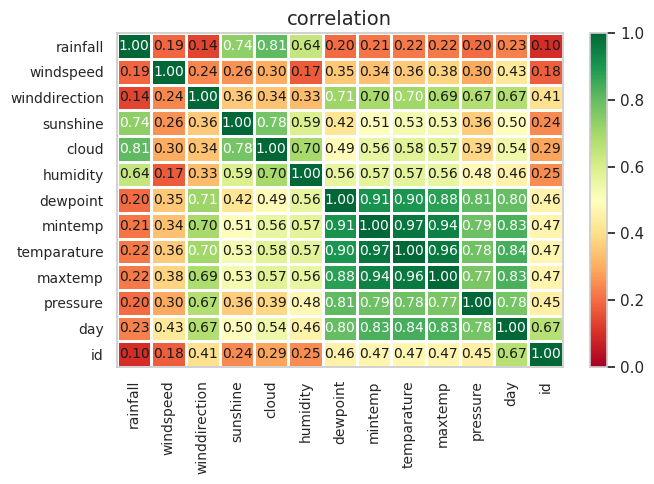

In [9]:
plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1)

sunshine, cloud, humidity 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


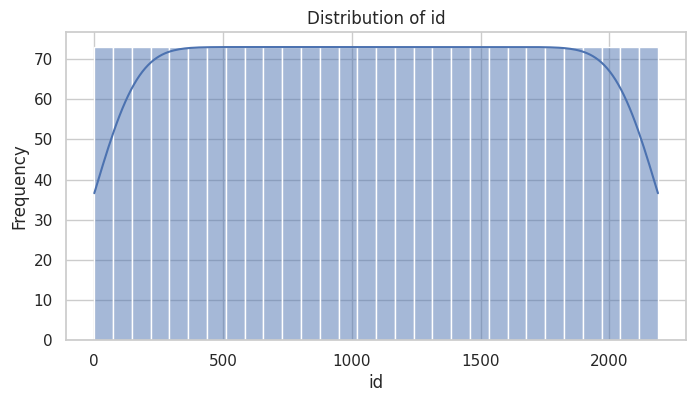

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


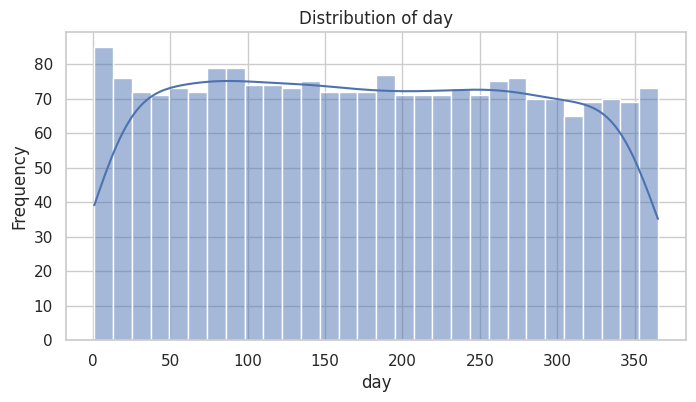

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


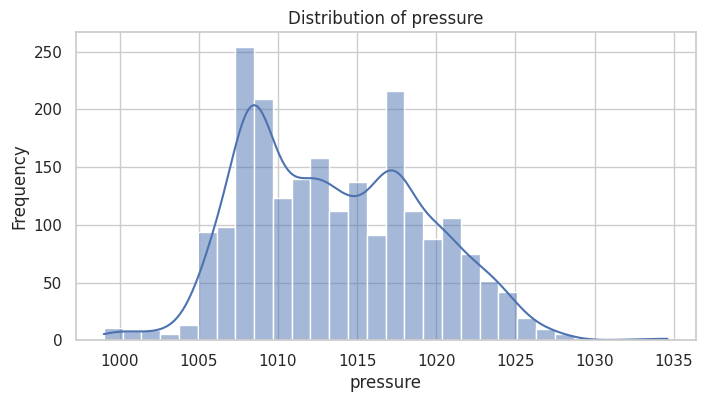

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


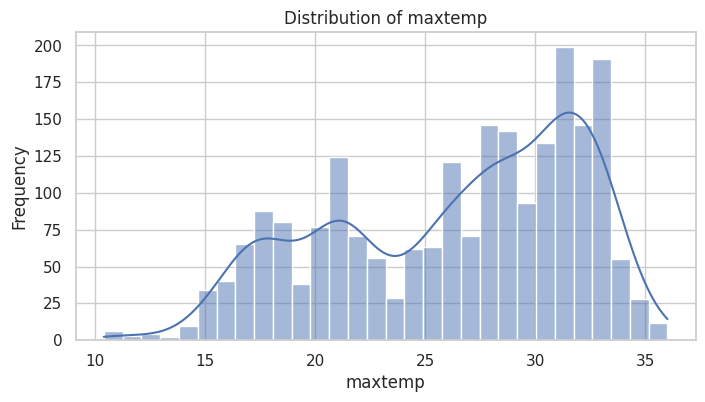

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


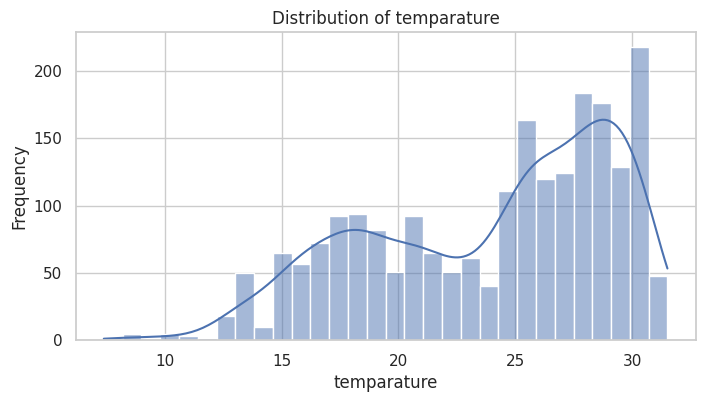

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


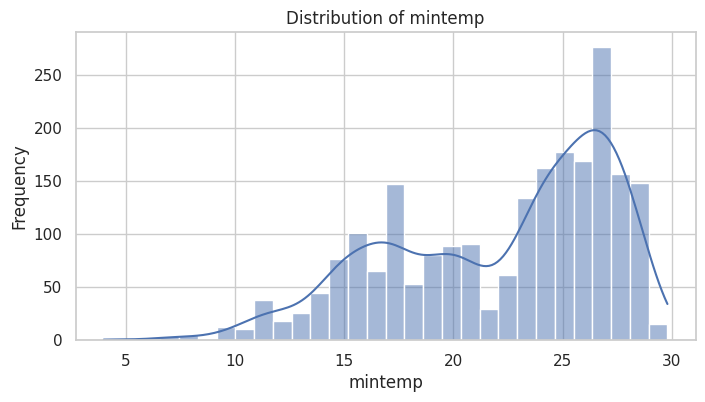

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


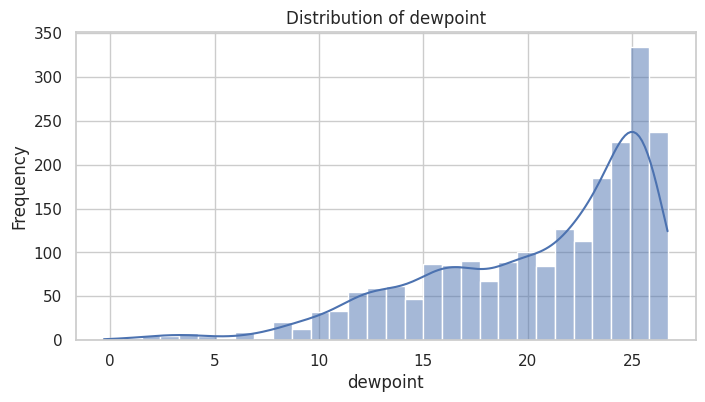

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


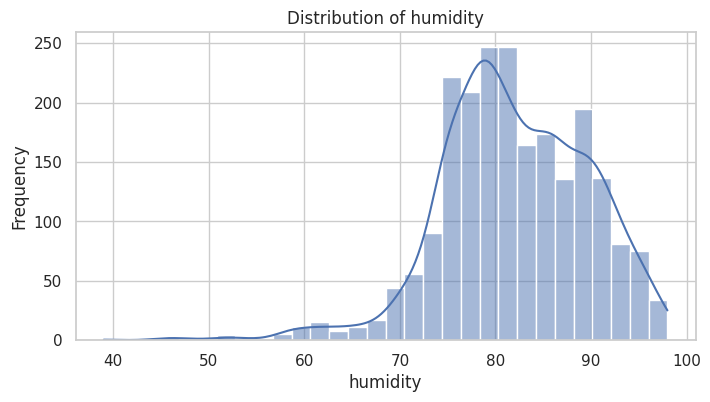

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


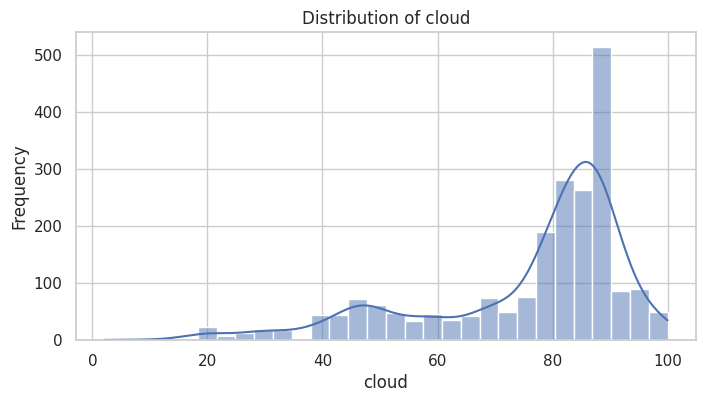

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


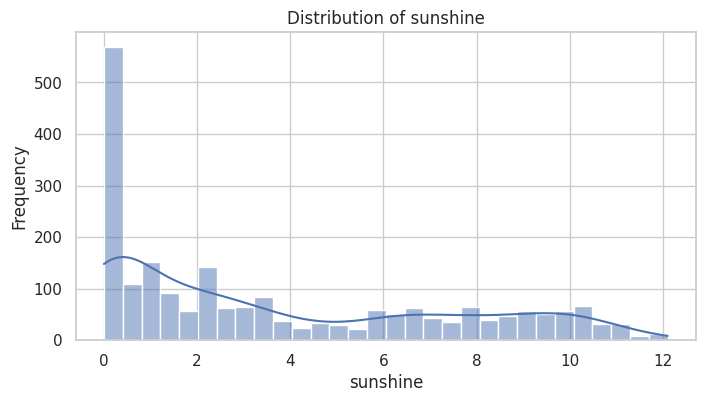

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


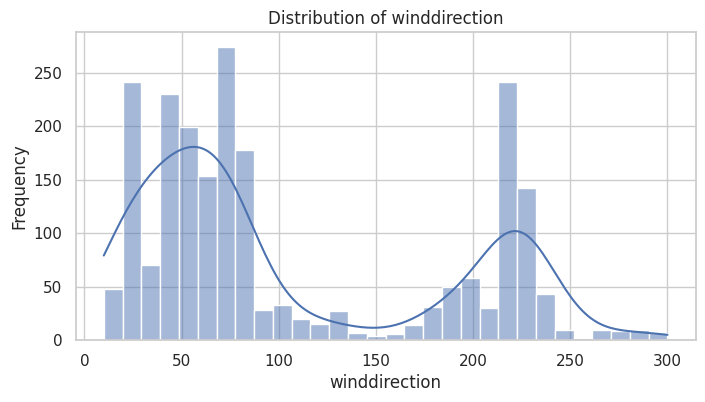

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


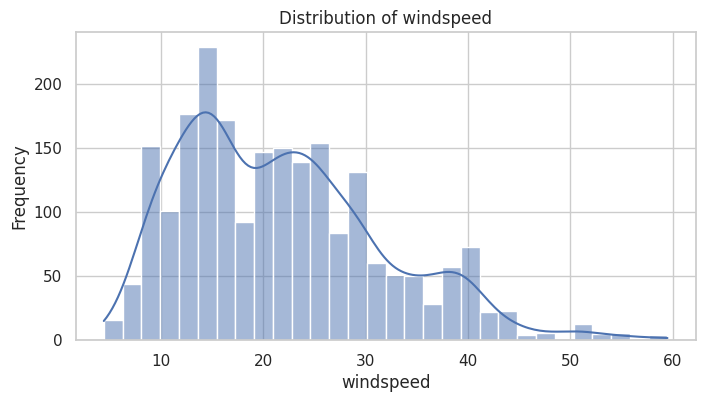

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


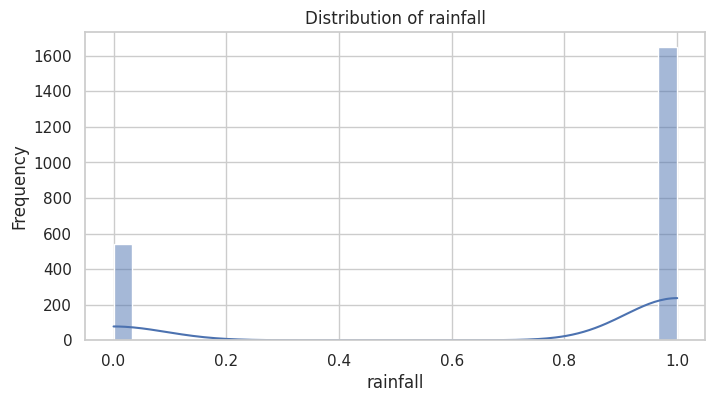

In [10]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Linear Regression Model (Base Line)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('rainfall', axis = 1)
y = df['rainfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)

(1752, 12)
(1752,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

L_model = LinearRegression()
L_model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = L_model.predict(X_test)

In [15]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 0.34
R² Score: 0.4061


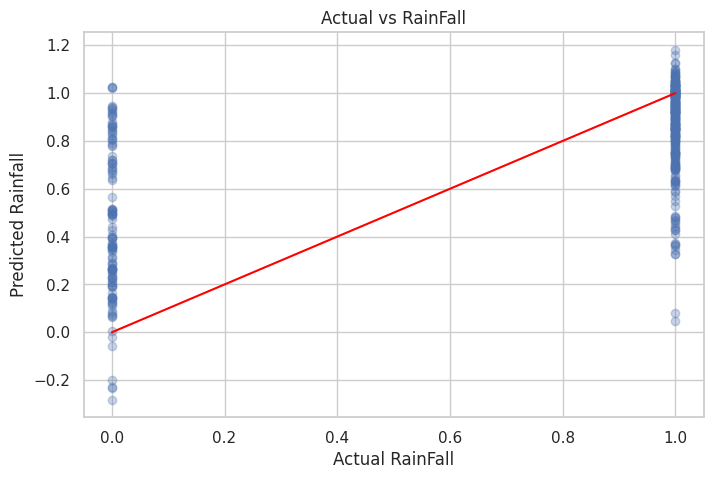

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual RainFall")
plt.ylabel("Predicted Rainfall")
plt.title("Actual vs RainFall")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # 45° line
plt.show()

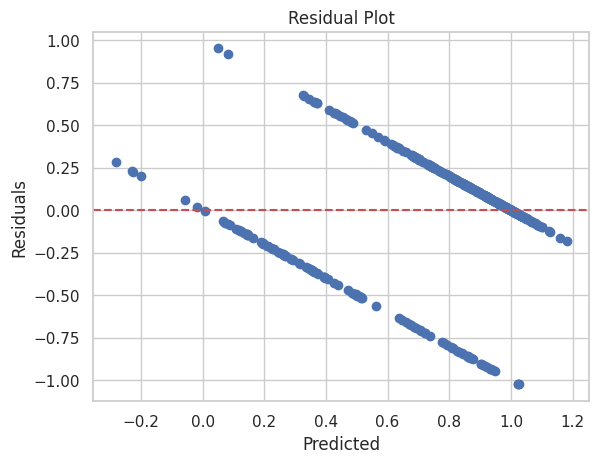

In [17]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [18]:
from sklearn.metrics import accuracy_score

# Convert to 0 or 1 using threshold
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Thresholded Accuracy (0.5): {accuracy:.2f}")

Thresholded Accuracy (0.5): 0.84


In [19]:
!pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

LR_data = df
df["humid_cloud"] = df["humidity"] * df["cloud"]
df["sun_cloud_ratio"] = df["sunshine"] / (df["cloud"] + 1)  # add 1 to avoid divide by 0
df["temp_range"] = df["maxtemp"] - df["mintemp"]
X = df.drop(columns=["id", "rainfall"])
y = df["rainfall"]

X = X.drop(columns=["mintemp", "maxtemp"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Unbalnced
model_orig = LogisticRegression()
model_orig.fit(X_train_scaled, y_train)
pred_orig = model_orig.predict(X_test_scaled)
proba_orig = model_orig.predict_proba(X_test_scaled)[:, 1]

#balanced
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train_scaled, y_train)
pred_weighted = model_weighted.predict(X_test_scaled)
proba_weighted = model_weighted.predict_proba(X_test_scaled)[:, 1]

#undersampleing
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

model_rus = LogisticRegression()
model_rus.fit(X_train_rus, y_train_rus)
pred_rus = model_rus.predict(X_test_scaled)
proba_rus = model_rus.predict_proba(X_test_scaled)[:, 1]

#SMOTE


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)
pred_smote = model_smote.predict(X_test_scaled)
proba_smote = model_smote.predict_proba(X_test_scaled)[:, 1]

# Predictions
# y_pred = log_reg.predict(X_test_scaled)
# y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# fpr, tpr, _ = roc_curve(y_test, y_proba)
# auc = roc_auc_score(y_test, y_proba)

# plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
# plt.plot([0,1], [0,1], linestyle='--', color='gray')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.show()

def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\n{name}")
    print(classification_report(y_true, y_pred))
    print(f"AUC: {roc_auc_score(y_true, y_proba):.4f}")

evaluate_model("Original", y_test, pred_orig, proba_orig)
evaluate_model("Class Weighted", y_test, pred_weighted, proba_weighted)
evaluate_model("Undersampled", y_test, pred_rus, proba_rus)
evaluate_model("SMOTE Oversampled", y_test, pred_smote, proba_smote)



Original
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       119
           1       0.87      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.78      0.80       438
weighted avg       0.85      0.85      0.85       438

AUC: 0.8722

Class Weighted
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       119
           1       0.89      0.87      0.88       319

    accuracy                           0.83       438
   macro avg       0.78      0.79      0.79       438
weighted avg       0.83      0.83      0.83       438

AUC: 0.8725

Undersampled
              precision    recall  f1-score   support

           0       0.61      0.73      0.66       119
           1       0.89      0.82      0.86       319

    accuracy                           0.80       438
   macro avg       0.75      0.78      0.76       438
weighted a

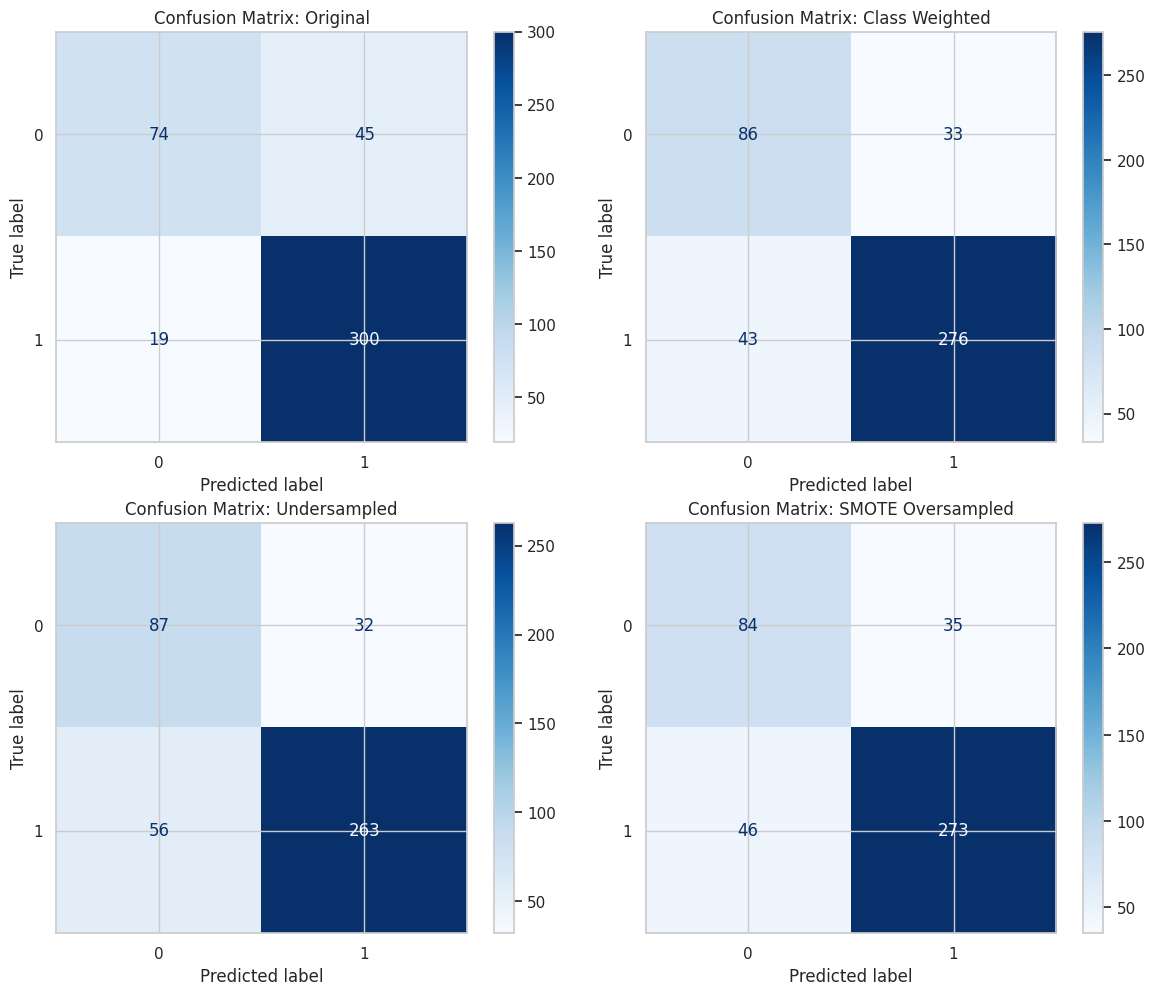

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    "Original": pred_orig,
    "Class Weighted": pred_weighted,
    "Undersampled": pred_rus,
    "SMOTE Oversampled": pred_smote
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=axes[i], cmap='Blues', values_format='d')
    axes[i].set_title(f"Confusion Matrix: {name}")

plt.tight_layout()
plt.show()
